### Seaborn Heat Maps
It is important to note that all variables for correlation matrix must be numeric! It has 18 configurable parameters
- **annot** = True / False - displays corr coefficients
- **fmt** - displays how many numbers are displayed after comma ('.2g' / '.3g')
- **vmin / vmax / vcentre** - min / max and centre values of axis
- **cmap** - color configuration
- **linewidths / linecolor** - set line color and width 
- **cbar_kws** - change color bar position
- **cbar** - Either True / False (Displays or hides color bar)
- **square** - Either True / False (Changes the shape of cells)

### Heat Map Shape 
To change HeatMap shape we need to use NumPy methods
- **np.triu()** - returns upper triangle
- **np.tril()** - returns lower triangle
- **mask** - takes NumPy methods and changes the shape of Heat Map

### Cool Colors
- RdYlBu, bwr

https://matplotlib.org/examples/color/colormaps_reference.html ( for more colors )

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [45]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
dummy_col = data.select_dtypes('category').columns
dummies = pd.get_dummies(data[dummy_col],drop_first=True)

col_to_drop = data.select_dtypes('category').columns
data.drop(columns=col_to_drop,inplace=True)
data = pd.concat([data,dummies],axis=1)
data.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


### Simple Correlaton Heat Map

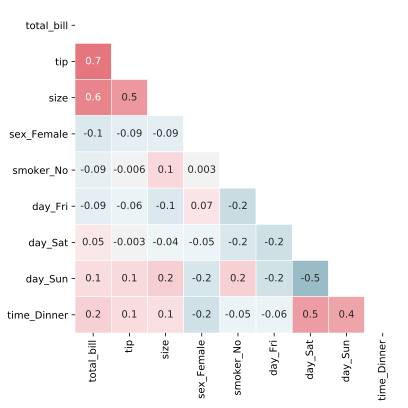

In [102]:
corr_matrix = data.corr()
mask_1 = np.triu(corr_matrix)
mask_2 = np.tril(corr_matrix)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.1g',
            vmin=-1,
            vmax=1,
            center=0,
            cmap=cmap,
            linewidths=0.5, 
            linecolor='white',
            cbar_kws = {'orientation': 'horizontal'},
            cbar=False,
            mask=mask_1,square=True);